### Euler-Bernoulli model with imperfect supports

The Euler-Bernoulli beam theory describes the bending of slender beams under load, assuming small deformations and negligible shear effects. The vertical displacement $u_y(z)$ under a constant load $p_0$ solves:

$$
    \frac{\mathrm{d}^4 u_y(z)}{\mathrm{d}z^4} = \frac{p_0}{EI},
$$

where $E$ is Young’s modulus and $I = \iint_A y^2 \, \mathrm{d}x \mathrm{d}y$ is the second moment of area of the beam’s cross-section. Derived quantities include:

$$
    \theta(z) = -\frac{\mathrm{d} u_y(z)}{\mathrm{d}z} \quad \text{(Rotation angle)}
$$

$$
    M(z) = -EI \, \frac{\mathrm{d}^2 u_y(z)}{\mathrm{d}z^2} \quad \text{(Bending moment)}
$$

$$
    F(z) = -EI \, \frac{\mathrm{d}^3 u_y(z)}{\mathrm{d}z^3} \quad \text{(Shear force)}
$$

$$
    U = EI \int_0^L \left(\frac{\mathrm{d}^2 u_y(z)}{\mathrm{d}z^2}\right)^2 \mathrm{d}z \quad \text{(Elastic energy, } L = \text{beam length)}
$$

We're going to handle many scenarios with nonelastic supports. These introduce uncertainties on the boundary conditions:

\begin{cases}
    u_y(z = 0) = u_0 \\
    u_y(z = L) = u_L \\
    \frac{\mathrm{d} u_y(z)}{\mathrm{d}z} (z = 0) = - \theta_0 \\
    \frac{\mathrm{d} u_y(z)}{\mathrm{d}z} (z = L) = - \theta_L \\
\end{cases}

For a perfect support the quantities $u_0, u_L, \theta_0, \theta_L$ shall be zero.

In [1]:
# Importing libraries
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining global variables
z = smp.symbols("z", real = True, nonnegative = True)
uy = smp.Function("u_y", real = True)(z)

# Defining constants
E, L, I, p0, = smp.symbols("E L I p_0", real = True, positive = True, constant = True)
f, m, u0, uL, theta0, thetaL = smp.symbols("f m u_0 u_L \\theta_0 \\theta_L", real = True, constant = True, nonzero = True)

In [3]:
def solver(boundary = 'None', concentrated = False):

    if concentrated:
        # Equation to solve
        eq = smp.Eq(smp.Derivative(uy, z, 4), 0)

        if boundary == 'cantilever beam force':
            ics = {
                uy.subs(z, 0): u0,
                smp.diff(uy, z, 1).subs(z, 0): - theta0,

                smp.diff(uy, z, 2).subs(z, L): 0,
                smp.diff(uy, z, 3).subs(z, L): - f / (E * I)
                }
        
        if boundary == 'cantilever beam moment':
            ics = {
                uy.subs(z, 0): u0,
                smp.diff(uy, z, 1).subs(z, 0): - theta0,

                smp.diff(uy, z, 2).subs(z, L): - m / (E * I),
                smp.diff(uy, z, 3).subs(z, L): 0
                }
            
        if boundary == 'simply supported beam':
            ics = {
                uy.subs(z, 0): u0,
                smp.diff(uy, z, 2).subs(z, 0): 0,

                uy.subs(z, L): uL,
                smp.diff(uy, z, 2).subs(z, L): - m / (E * I)
                }
        
        if boundary == 'propped-cantilever beam':
            ics = {
                uy.subs(z, 0): u0,
                smp.diff(uy, z, 1).subs(z, 0): - theta0,

                uy.subs(z, L): uL,
                smp.diff(uy, z, 2).subs(z, L): - m / (E * I)
                }
            
        if boundary == 'fixed-guided beam':
            ics = {
                uy.subs(z, 0): u0,
                smp.diff(uy, z, 1).subs(z, 0): - theta0,

                smp.diff(uy, z, 1).subs(z, L): - thetaL,
                smp.diff(uy, z, 3).subs(z, L): - f / (E * I)
                }
    
    else:
        # Equation to solve
        eq = smp.Eq(smp.Derivative(uy, z, 4), p0 / (E * I))
        
        if boundary == 'fixed-fixed beam':
            ics = {
                uy.subs(z, 0): u0,
                smp.diff(uy, z, 1).subs(z, 0): - theta0,

                uy.subs(z, L): uL,
                smp.diff(uy, z, 1).subs(z, L): - thetaL
                }
        
        if boundary == 'simply supported beam':
            ics = {
                uy.subs(z, 0): u0,
                smp.diff(uy, z, 2).subs(z, 0): 0,

                uy.subs(z, L): uL,
                smp.diff(uy, z, 2).subs(z, L): 0
                }
            
        if boundary == 'cantilever beam':
            ics = {
                uy.subs(z, 0): u0,
                smp.diff(uy, z, 1).subs(z, 0): - theta0,

                smp.diff(uy, z, 2).subs(z, L): 0,
                smp.diff(uy, z, 3).subs(z, L): 0
                }
            
        if boundary == 'propped-cantilever beam':
            ics = {
                uy.subs(z, 0): u0,
                smp.diff(uy, z, 1).subs(z, 0): - theta0,

                uy.subs(z, L): uL,
                smp.diff(uy, z, 2).subs(z, L): 0
                }
            
        if boundary == 'fixed-guided beam':
            ics = {
                uy.subs(z, 0): u0,
                smp.diff(uy, z, 1).subs(z, 0): - theta0,

                smp.diff(uy, z, 1).subs(z, L): - thetaL,
                smp.diff(uy, z, 3).subs(z, L): 0
                }
        
        if boundary == 'pinned-guided beam':
            ics = {
                uy.subs(z, 0): u0,
                smp.diff(uy, z, 2).subs(z, 0): 0,
                
                smp.diff(uy, z, 1).subs(z, L): - thetaL,
                smp.diff(uy, z, 3).subs(z, L): 0
                }
        
        if boundary == 'None':
            ics = None
    
    # Solving the equations with the choosen boundaries
    sol = smp.dsolve(eq, uy, ics = ics).rhs

    # Computing the angle
    theta = - smp.diff(sol, z, 1)

    # Computing the bending moment
    M = - E * I * smp.diff(sol, z, 2)

    # Computing the shear force
    F = smp.diff(M, z, 1)

    # Computing the elastic energy
    U = smp.expand(E * I * smp.integrate(smp.diff(sol, z, 2) ** 2, (z, 0, L)))

    # Simplifying expressions
    def simplify(expression):
        expression_expanded = smp.expand(expression)
        expression_factorized = smp.collect(expression_expanded, [u0, uL, theta0, thetaL])
        return expression_factorized
    
    sol = simplify(sol)
    theta = simplify(theta)
    M = simplify(M)
    F = simplify(F)

    solution = (sol, theta, M, F, U)
    return solution

In [4]:
def plotter(solution, E_, L_, I_, p0_ = 0, f_ = 0, m_ = 0, nu0_ = 0, nuL_ = 0, theta0_ = 0, thetaL_ = 0):

    z_ = np.linspace(0, L_, 1000)
    
    # Defining plot metadata
    plot_data = {
        0: {"title": "Vertical Displacement", "label": r"$u_y(z)$", "ylabel": "Displacement (m)", "color": "#1f77b4"},
        1: {"title": "Angle Rotation", "label": r"$\theta(z)$", "ylabel": "Angle (rad)", "color": "#ff7f0e"},
        2: {"title": "Bending Moment", "label": r"$M(z)$", "ylabel": "Moment (N·m)", "color": "#2ca02c"},
        3: {"title": "Shear Force", "label": r"$F_y(z)$", "ylabel": "Force (N)", "color": "#d62728"}
    }
    
    # Creating a 2x2 plot grid
    fig, axs = plt.subplots(2, 2, figsize = (14, 10))
    axs = axs.flatten()
    
    # Setting global figure properties
    plt.rcParams.update({
        'font.size': 12,
        'font.family': 'serif',
        'mathtext.fontset': 'stix',
    })
    
    # Adding main figure title with parameters
    fig.suptitle(
        f"Beam Analysis: $E$ = {E_:.1e} Pa, $L$ = {L_} m, $I$ = {I_:.1e} m$^4$, $p_0$ = {p0_} N/m",
        fontsize = 16,
        fontweight = 'bold',
        y = 0.98
    )
    
    # Plotting each quantity in its own subplot
    for j in range(4):

        # Creating the numerical functions from symbolic expression
        func = smp.lambdify([z, E, L, I, p0, f, m, u0, uL, theta0, thetaL], solution[j])
        y_vals = func(z_, E_, L_, I_, p0_, f_, m_, nu0_, nuL_, theta0_, thetaL_) * np.ones(len(z_))
        y_exact = func(z_, E_, L_, I_, p0_, f_, m_, 0, 0, 0, 0) * np.ones(len(z_))
        
        # Plotting with styling
        axs[j].plot(z_, y_vals, 
                   color = plot_data[j]["color"], 
                   linewidth = 2.5,
                   label = plot_data[j]["label"])
        
        axs[j].plot(z_, y_exact, 
                   color = 'black',
                   alpha = 0.8, 
                   linewidth = 2,
                   label = 'Baseline',
                   linestyle = '--')
        
        # Add dashed zero axes (x = 0 and y = 0)
        axs[j].axhline(0, color = 'black', linestyle = '--', alpha = 0.5, zorder = 0)
        axs[j].axvline(0, color = 'black', linestyle = '--', alpha = 0.5, zorder = 0)
        
        # Adding subplot decorations
        axs[j].set_title(plot_data[j]["title"], fontsize = 14, pad = 12)
        axs[j].set_xlabel("z (m)", fontsize = 12, labelpad = 10)
        axs[j].set_ylabel(plot_data[j]["ylabel"], fontsize = 12, labelpad = 10)
        axs[j].legend(loc = 'best', framealpha = 0.9, shadow = True)
        
        # Adding grid and set spines
        axs[j].grid(True, linestyle = '--', alpha = 0.7)
        axs[j].spines[['right', 'top']].set_visible(False)
        
        # Setting scientific notation for large values
        if max(np.abs(y_vals)) > 1e4 or min(np.abs(y_vals)) < 1e-3:
            axs[j].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 0))
    
    # Adding footer with elastic energy
    elastic_energy = solution[4].subs({E: E_, L: L_, I: I_, p0: p0_, f: f_, m: m_, u0: nu0_, uL: nuL_, theta0: theta0_, thetaL: thetaL_})
    
    fig.text(
        0.5, 0.01, 
        f"Total Elastic Energy: U = {float(elastic_energy):.3e} J", 
        ha='center', 
        fontsize=12,
        bbox = dict(facecolor = 'lightgray', alpha = 0.5, boxstyle = 'round')
    )
    
    plt.tight_layout(rect = [0, 0.05, 1, 0.96])

    return None

In [5]:
# Setting constants
E_ = 30
L_ = 10
I_ = 15
p0_ = 20
f_ = 20
m_ = 15
nu0_ = 0.1
nuL_ = 0.3
theta0_ = 0.3
thetaL_ = 0.1

In [6]:
# Solution for a fixed-fixed beam
sol = solver('fixed-fixed beam')

In [7]:
# Vertical displacement
sol[0]

\theta_0*(-z + 2*z**2/L - z**3/L**2) + \theta_L*(z**2/L - z**3/L**2) + u_0*(1 - 3*z**2/L**2 + 2*z**3/L**3) + u_L*(3*z**2/L**2 - 2*z**3/L**3) + L**2*p_0*z**2/(24*E*I) - L*p_0*z**3/(12*E*I) + p_0*z**4/(24*E*I)

In [8]:
# Angle
sol[1]

\theta_0*(1 - 4*z/L + 3*z**2/L**2) + \theta_L*(-2*z/L + 3*z**2/L**2) + u_0*(6*z/L**2 - 6*z**2/L**3) + u_L*(-6*z/L**2 + 6*z**2/L**3) - L**2*p_0*z/(12*E*I) + L*p_0*z**2/(4*E*I) - p_0*z**3/(6*E*I)

In [9]:
# Bending moment
sol[2]

-L**2*p_0/12 + L*p_0*z/2 + \theta_0*(-4*E*I/L + 6*E*I*z/L**2) + \theta_L*(-2*E*I/L + 6*E*I*z/L**2) - p_0*z**2/2 + u_0*(6*E*I/L**2 - 12*E*I*z/L**3) + u_L*(-6*E*I/L**2 + 12*E*I*z/L**3)

In [10]:
# Shear force
sol[3]

6*E*I*\theta_0/L**2 + 6*E*I*\theta_L/L**2 - 12*E*I*u_0/L**3 + 12*E*I*u_L/L**3 + L*p_0/2 - p_0*z

In [11]:
# Elastic energy
sol[4]

4*E*I*\theta_0**2/L + 4*E*I*\theta_0*\theta_L/L + 4*E*I*\theta_L**2/L - 12*E*I*\theta_0*u_0/L**2 + 12*E*I*\theta_0*u_L/L**2 - 12*E*I*\theta_L*u_0/L**2 + 12*E*I*\theta_L*u_L/L**2 + 12*E*I*u_0**2/L**3 - 24*E*I*u_0*u_L/L**3 + 12*E*I*u_L**2/L**3 + L**5*p_0**2/(720*E*I)

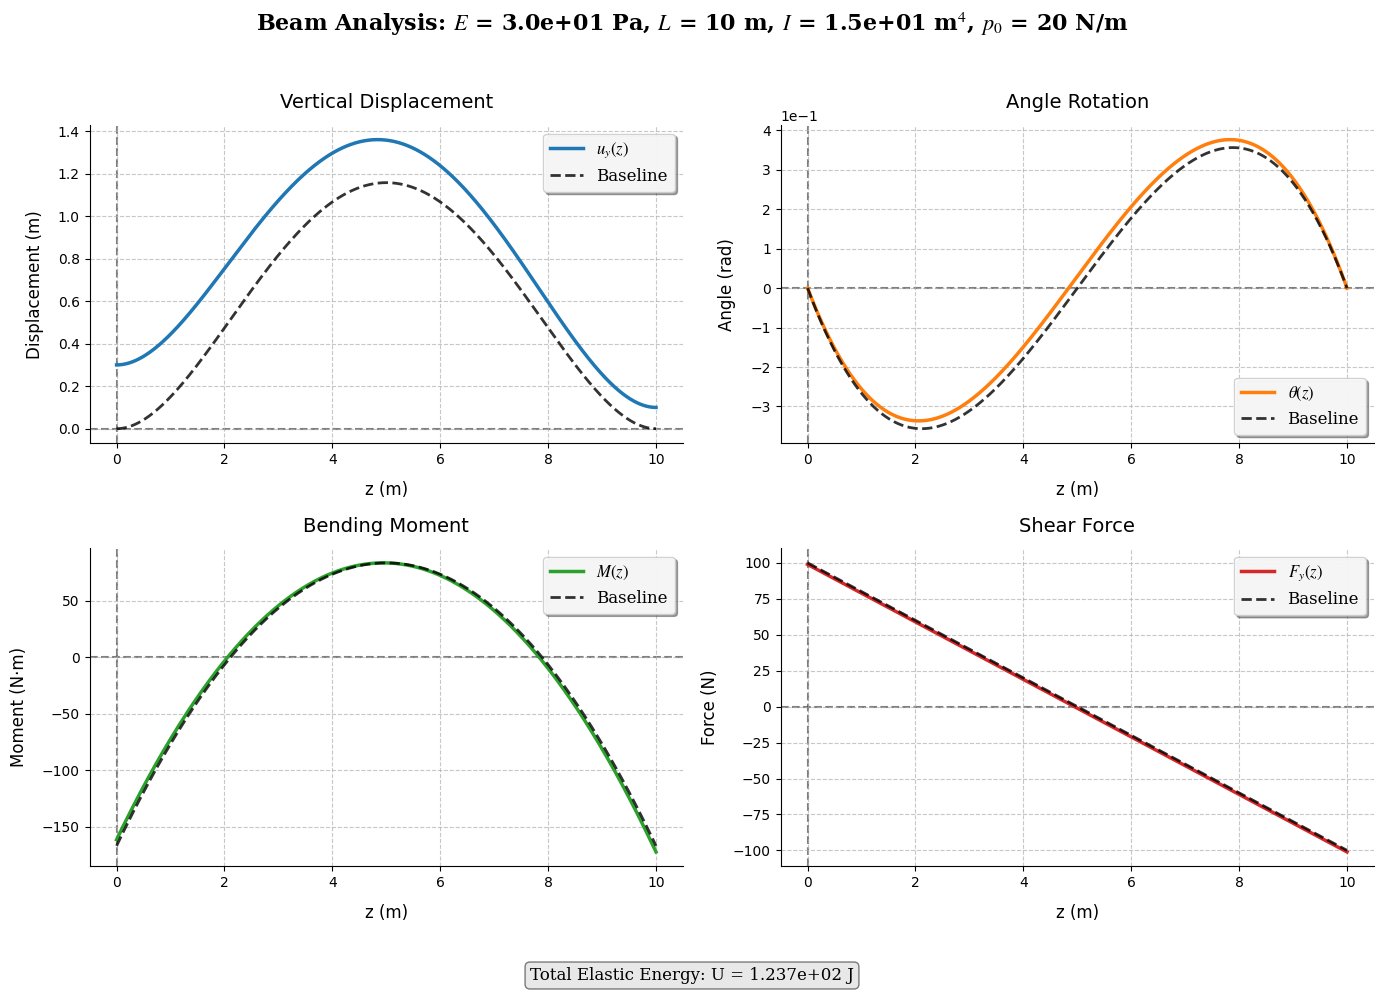

In [12]:
# Plot of the solution
plotter(sol, E_, L_, I_, p0_, nu0_, nuL_, theta0_, thetaL_)

In [13]:
# Solution for a simply supported beam
sol = solver('simply supported beam')

In [14]:
# Vertical displacement
sol[0]

u_0*(1 - z/L) + u_L*z/L + L**3*p_0*z/(24*E*I) - L*p_0*z**3/(12*E*I) + p_0*z**4/(24*E*I)

In [15]:
# Angle
sol[1]

u_0/L - u_L/L - L**3*p_0/(24*E*I) + L*p_0*z**2/(4*E*I) - p_0*z**3/(6*E*I)

In [16]:
# Bending moment
sol[2]

L*p_0*z/2 - p_0*z**2/2

In [17]:
# Shear force
sol[3]

L*p_0/2 - p_0*z

In [18]:
# Elastic energy
sol[4]

L**5*p_0**2/(120*E*I)

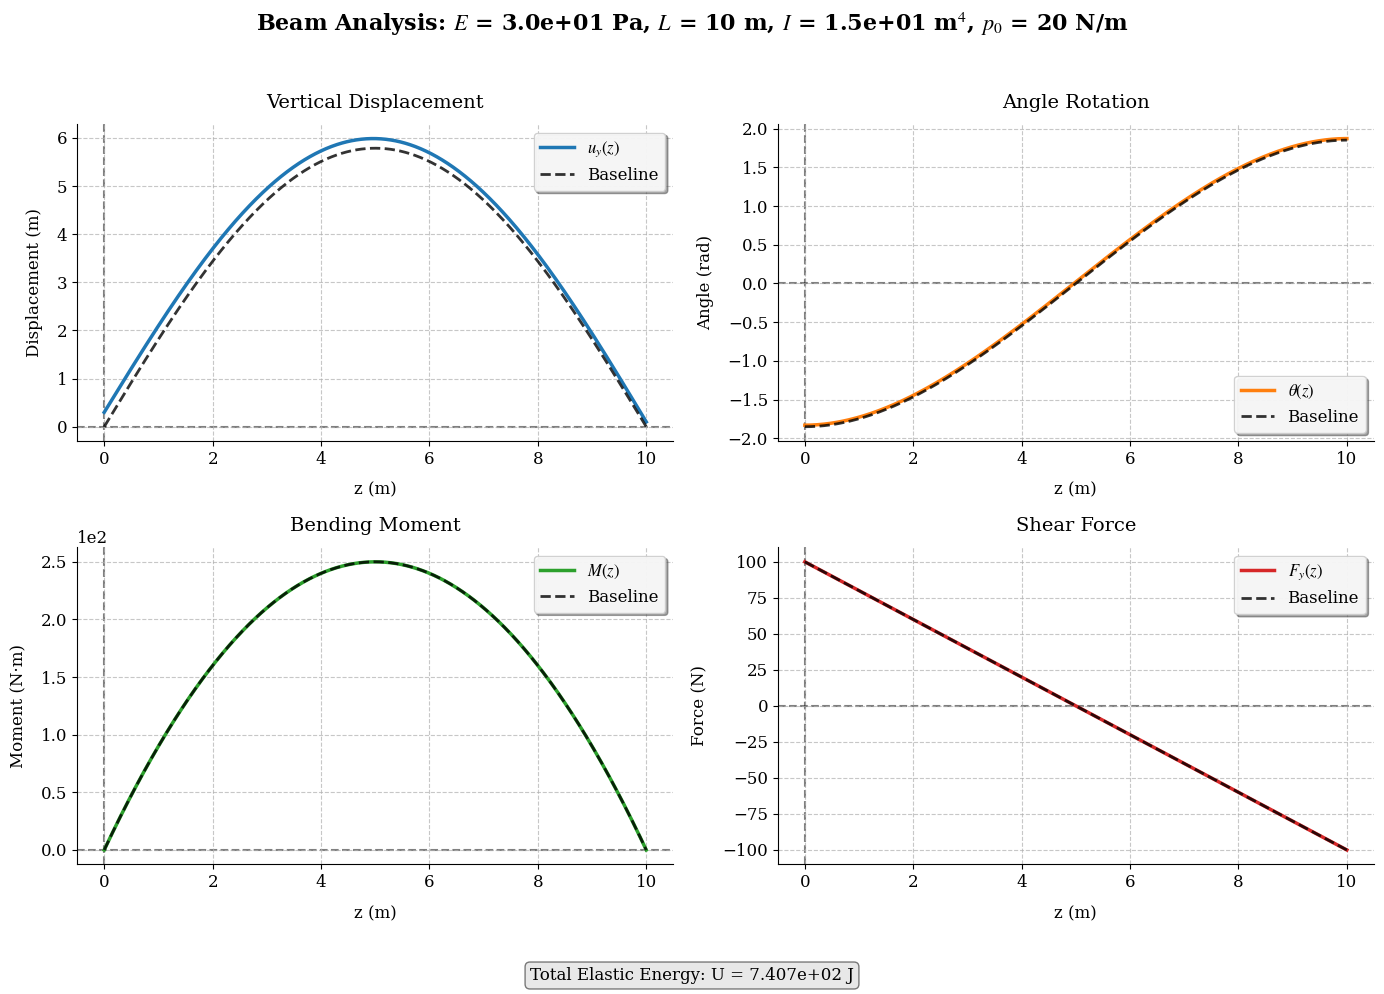

In [19]:
# Plot of the solution
plotter(sol, E_, L_, I_, p0_, nu0_, nuL_, theta0_, thetaL_)

In [20]:
# Solution for a cantilever beam
sol = solver('cantilever beam')

In [21]:
# Vertical displacement
sol[0]

-\theta_0*z + u_0 + L**2*p_0*z**2/(4*E*I) - L*p_0*z**3/(6*E*I) + p_0*z**4/(24*E*I)

In [22]:
# Angle
sol[1]

\theta_0 - L**2*p_0*z/(2*E*I) + L*p_0*z**2/(2*E*I) - p_0*z**3/(6*E*I)

In [23]:
# Bending moment
sol[2]

-L**2*p_0/2 + L*p_0*z - p_0*z**2/2

In [24]:
# Shear force
sol[3]

L*p_0 - p_0*z

In [25]:
# Elastic energy
sol[4]

L**5*p_0**2/(20*E*I)

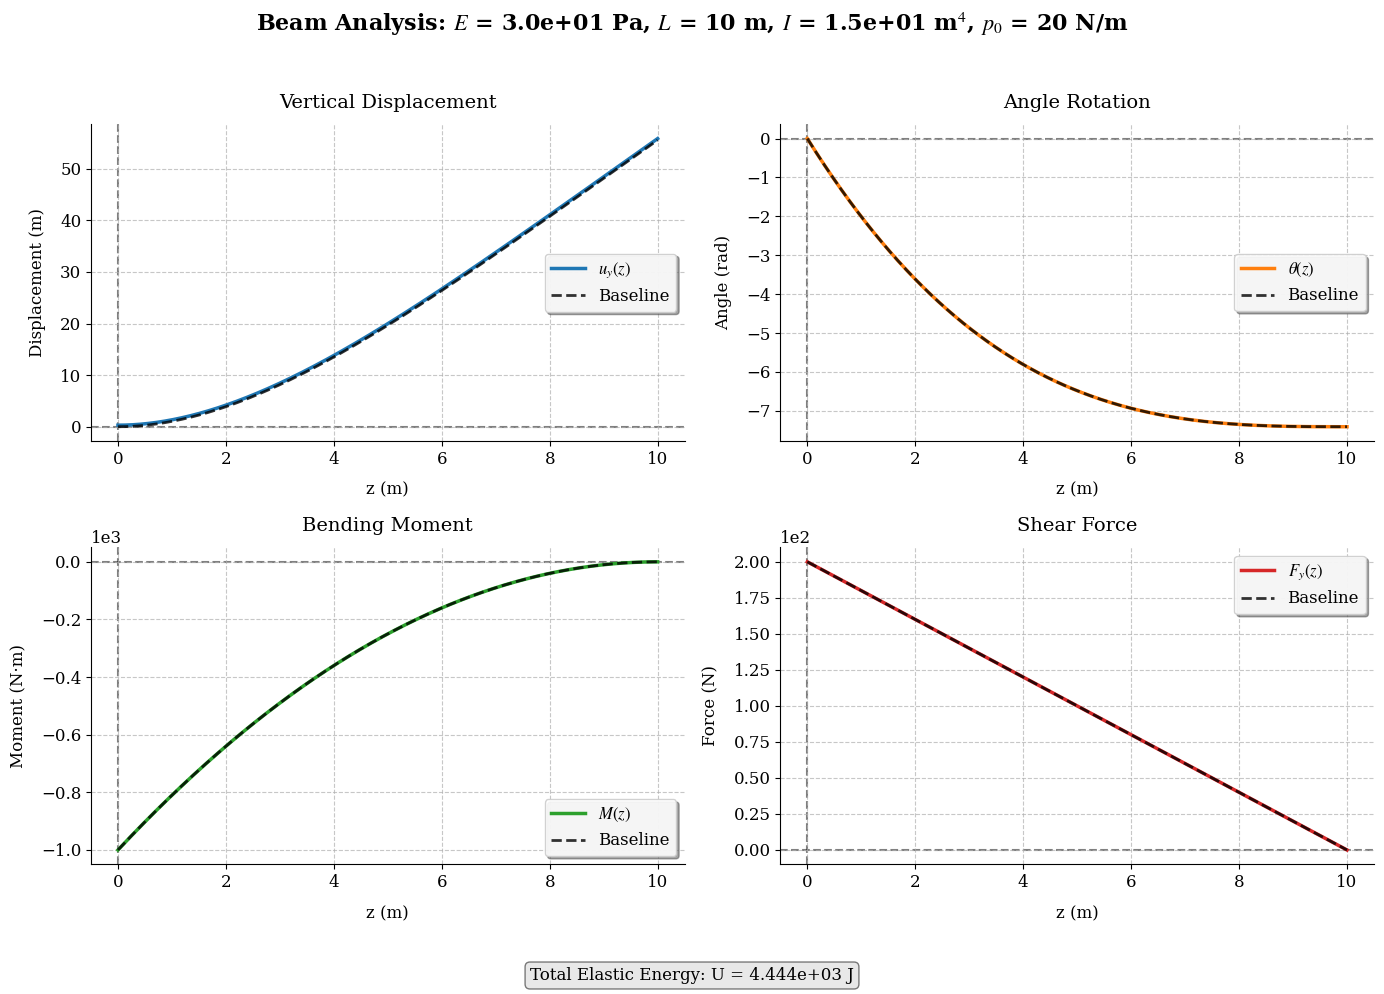

In [26]:
# Plot of the solution
plotter(sol, E_, L_, I_, p0_, nu0_, nuL_, theta0_, thetaL_)

In [27]:
# Solution for a propped-cantilever beam
sol = solver('propped-cantilever beam')

In [28]:
# Vertical displacement
sol[0]

\theta_0*(-z + 3*z**2/(2*L) - z**3/(2*L**2)) + u_0*(1 - 3*z**2/(2*L**2) + z**3/(2*L**3)) + u_L*(3*z**2/(2*L**2) - z**3/(2*L**3)) + L**2*p_0*z**2/(16*E*I) - 5*L*p_0*z**3/(48*E*I) + p_0*z**4/(24*E*I)

In [29]:
# Angle
sol[1]

\theta_0*(1 - 3*z/L + 3*z**2/(2*L**2)) + u_0*(3*z/L**2 - 3*z**2/(2*L**3)) + u_L*(-3*z/L**2 + 3*z**2/(2*L**3)) - L**2*p_0*z/(8*E*I) + 5*L*p_0*z**2/(16*E*I) - p_0*z**3/(6*E*I)

In [30]:
# Bending moment
sol[2]

-L**2*p_0/8 + 5*L*p_0*z/8 + \theta_0*(-3*E*I/L + 3*E*I*z/L**2) - p_0*z**2/2 + u_0*(3*E*I/L**2 - 3*E*I*z/L**3) + u_L*(-3*E*I/L**2 + 3*E*I*z/L**3)

In [31]:
# Shear force
sol[3]

3*E*I*\theta_0/L**2 - 3*E*I*u_0/L**3 + 3*E*I*u_L/L**3 + 5*L*p_0/8 - p_0*z

In [32]:
# Elastic energy
sol[4]

3*E*I*\theta_0**2/L - 6*E*I*\theta_0*u_0/L**2 + 6*E*I*\theta_0*u_L/L**2 + 3*E*I*u_0**2/L**3 - 6*E*I*u_0*u_L/L**3 + 3*E*I*u_L**2/L**3 + L**5*p_0**2/(320*E*I)

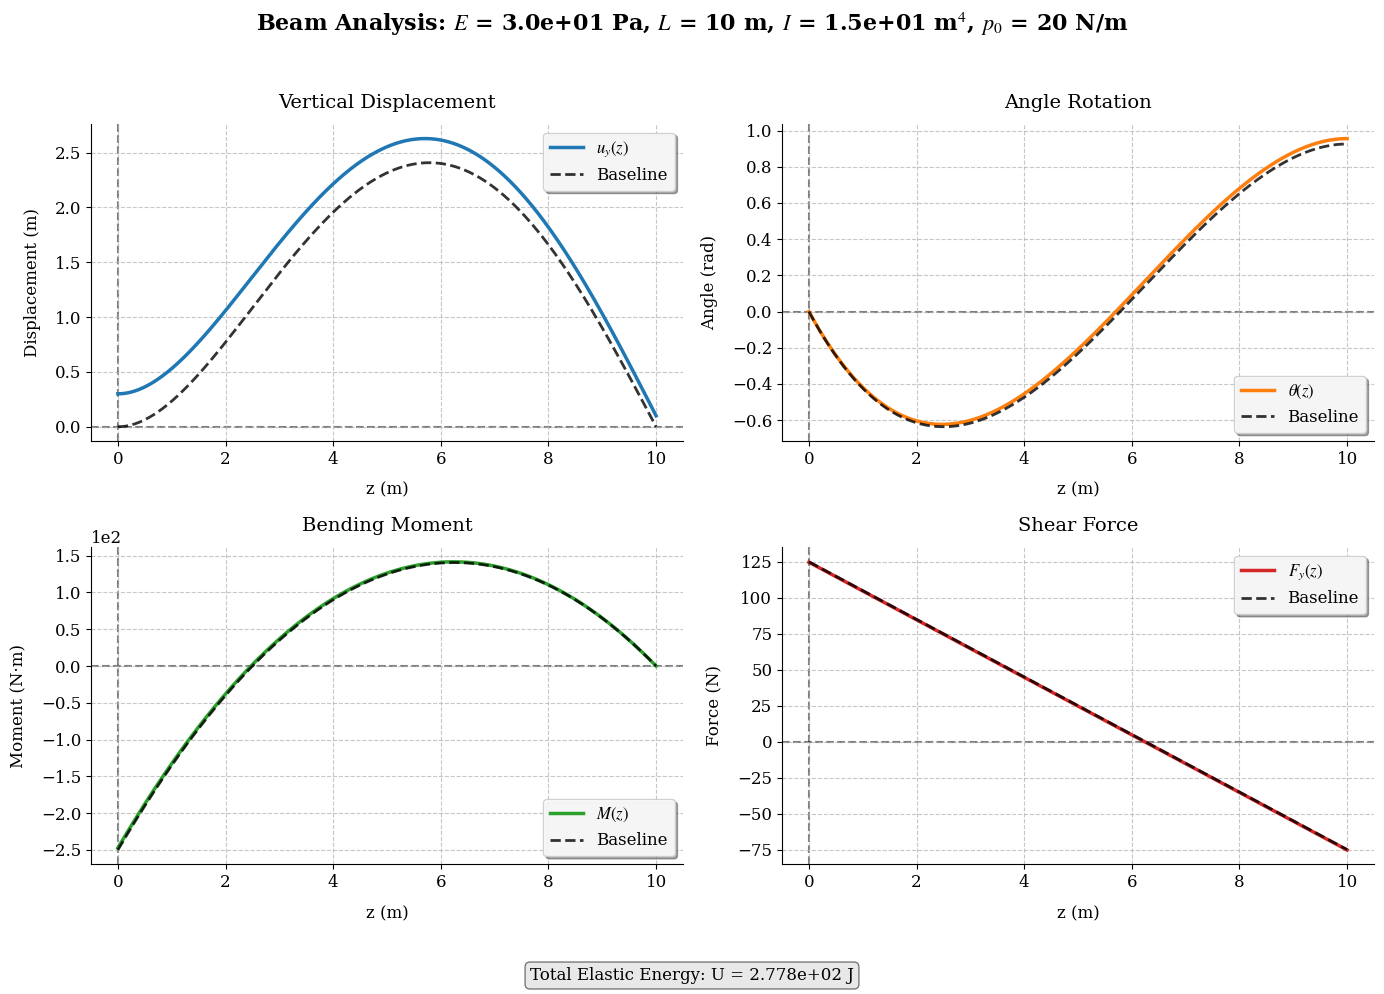

In [33]:
# Plot of the solution
plotter(sol, E_, L_, I_, p0_, nu0_, nuL_, theta0_, thetaL_)

In [34]:
# Solution for a fixed-guided beam
sol = solver('fixed-guided beam')

In [35]:
# Vertical displacement
sol[0]

\theta_0*(-z + z**2/(2*L)) + u_0 - \theta_L*z**2/(2*L) + L**2*p_0*z**2/(6*E*I) - L*p_0*z**3/(6*E*I) + p_0*z**4/(24*E*I)

In [36]:
# Angle
sol[1]

\theta_0*(1 - z/L) + \theta_L*z/L - L**2*p_0*z/(3*E*I) + L*p_0*z**2/(2*E*I) - p_0*z**3/(6*E*I)

In [37]:
# Bending moment
sol[2]

-E*I*\theta_0/L + E*I*\theta_L/L - L**2*p_0/3 + L*p_0*z - p_0*z**2/2

In [38]:
# Shear force
sol[3]

L*p_0 - p_0*z

In [39]:
# Elastic energy
sol[4]

E*I*\theta_0**2/L - 2*E*I*\theta_0*\theta_L/L + E*I*\theta_L**2/L + L**5*p_0**2/(45*E*I)

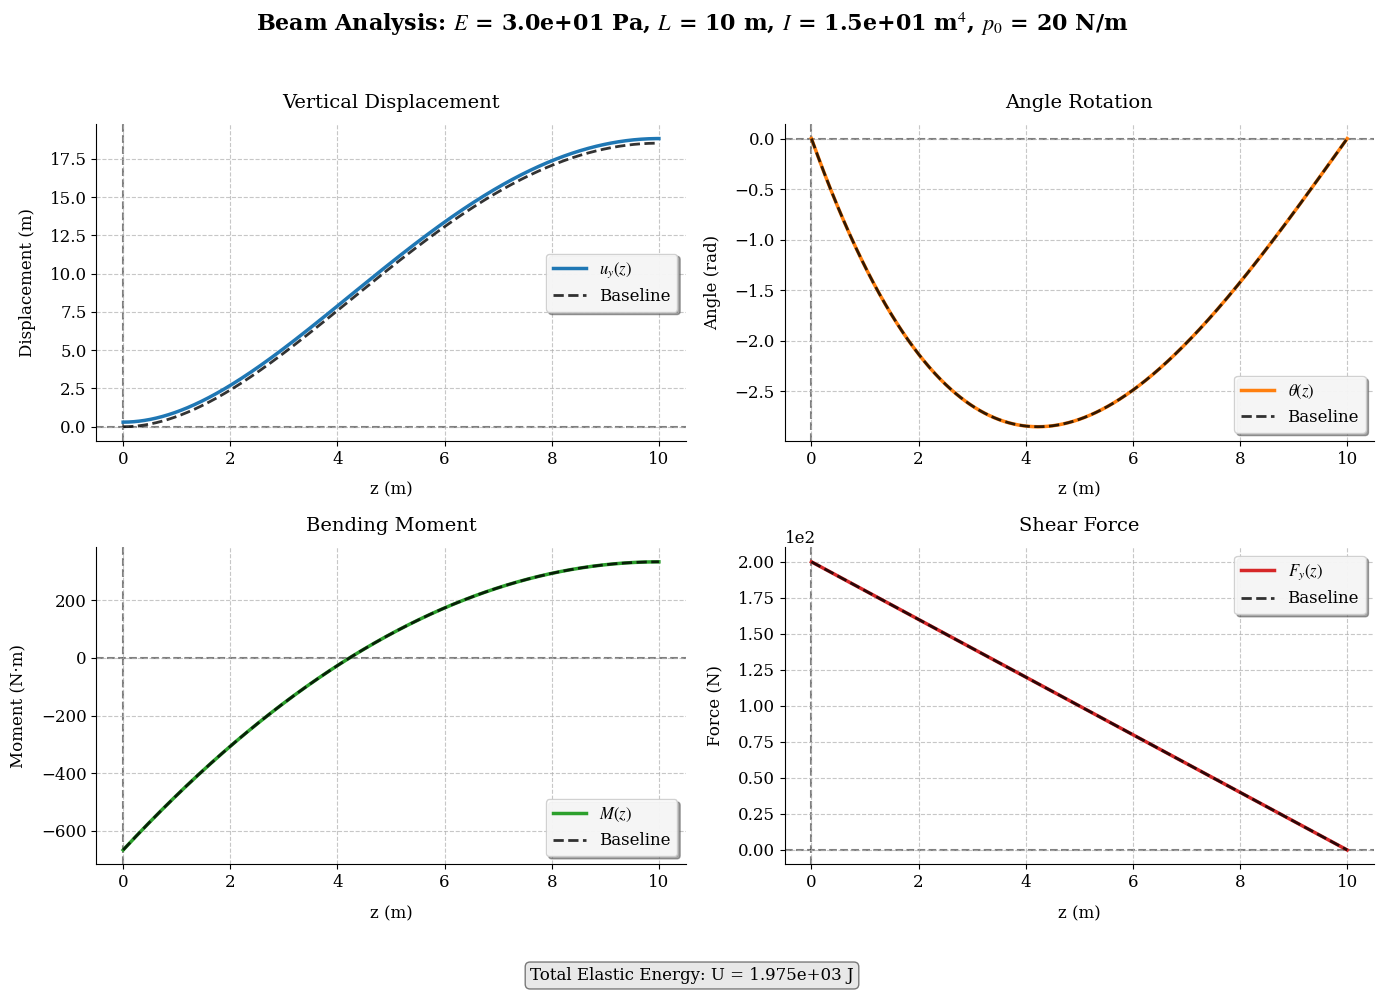

In [40]:
# Plot of the solution
plotter(sol, E_, L_, I_, p0_, nu0_, nuL_, theta0_, thetaL_)

In [41]:
# Solution for a pinned-guided beam
sol = solver('pinned-guided beam')

In [42]:
# Vertical displacement
sol[0]

-\theta_L*z + u_0 + L**3*p_0*z/(3*E*I) - L*p_0*z**3/(6*E*I) + p_0*z**4/(24*E*I)

In [43]:
# Angle
sol[1]

\theta_L - L**3*p_0/(3*E*I) + L*p_0*z**2/(2*E*I) - p_0*z**3/(6*E*I)

In [44]:
# Bending moment
sol[2]

L*p_0*z - p_0*z**2/2

In [45]:
# Shear force
sol[3]

L*p_0 - p_0*z

In [46]:
# Elastic energy
sol[4]

2*L**5*p_0**2/(15*E*I)

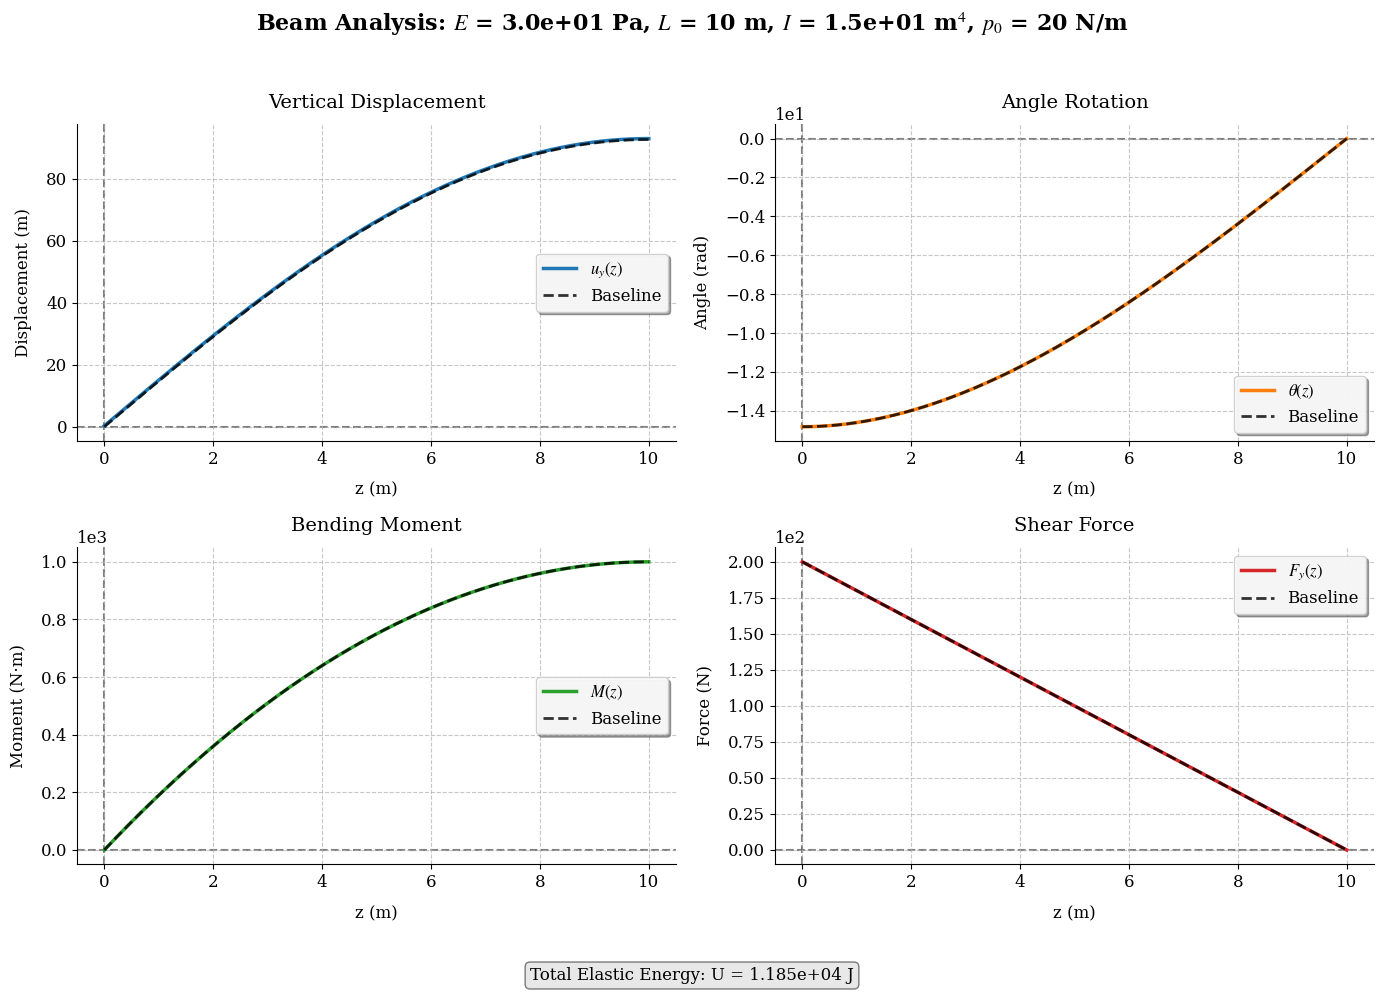

In [47]:
# Plot of the solution
plotter(sol, E_, L_, I_, p0_, nu0_, nuL_, theta0_, thetaL_)

In [48]:
# Solution for a cantilever beam with a concentrated force
sol = solver('cantilever beam force', True)

In [49]:
# Vertical displacement
sol[0]

-\theta_0*z + u_0 + L*f*z**2/(2*E*I) - f*z**3/(6*E*I)

In [50]:
# Angle
sol[1]

\theta_0 - L*f*z/(E*I) + f*z**2/(2*E*I)

In [51]:
# Bending moment
sol[2]

-L*f + f*z

In [52]:
# Shear force
sol[3]

f

In [53]:
# Elastic energy
sol[4]

L**3*f**2/(3*E*I)

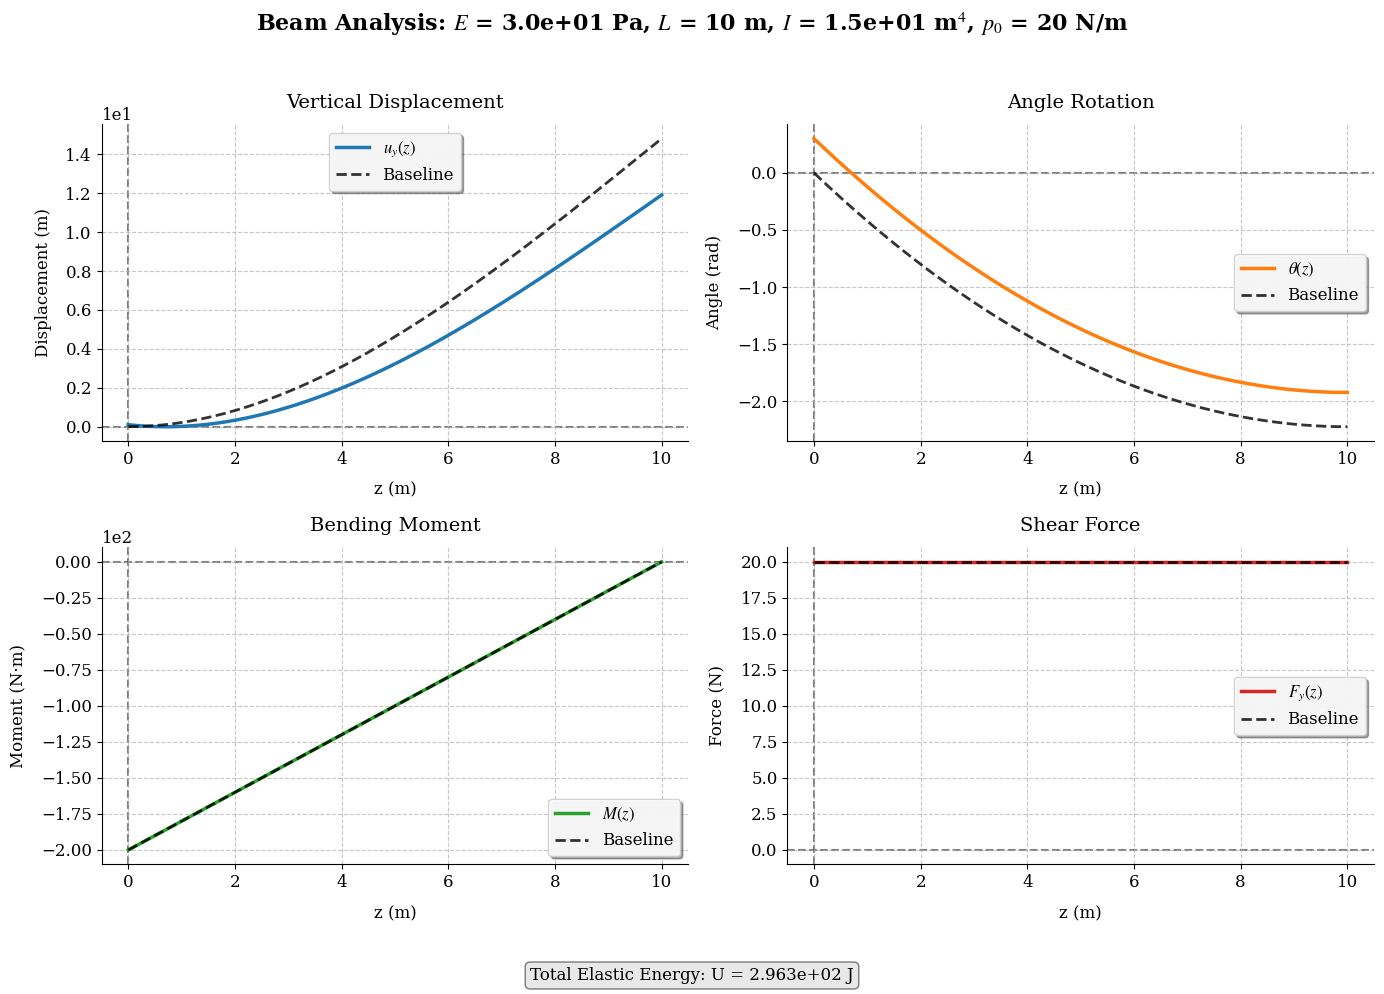

In [54]:
# Plot of the solution
plotter(sol, E_, L_, I_, p0_, f_, m_, nu0_, nuL_, theta0_, thetaL_)

In [55]:
# Solution for a cantilever beam with a bending moment
sol = solver('cantilever beam moment', True)

In [56]:
# Vertical displacement
sol[0]

-\theta_0*z + u_0 - m*z**2/(2*E*I)

In [57]:
# Angle
sol[1]

\theta_0 + m*z/(E*I)

In [58]:
# Bending moment
sol[2]

m

In [59]:
# Shear force
sol[3]

0

In [60]:
# Elastic energy
sol[4]

L*m**2/(E*I)

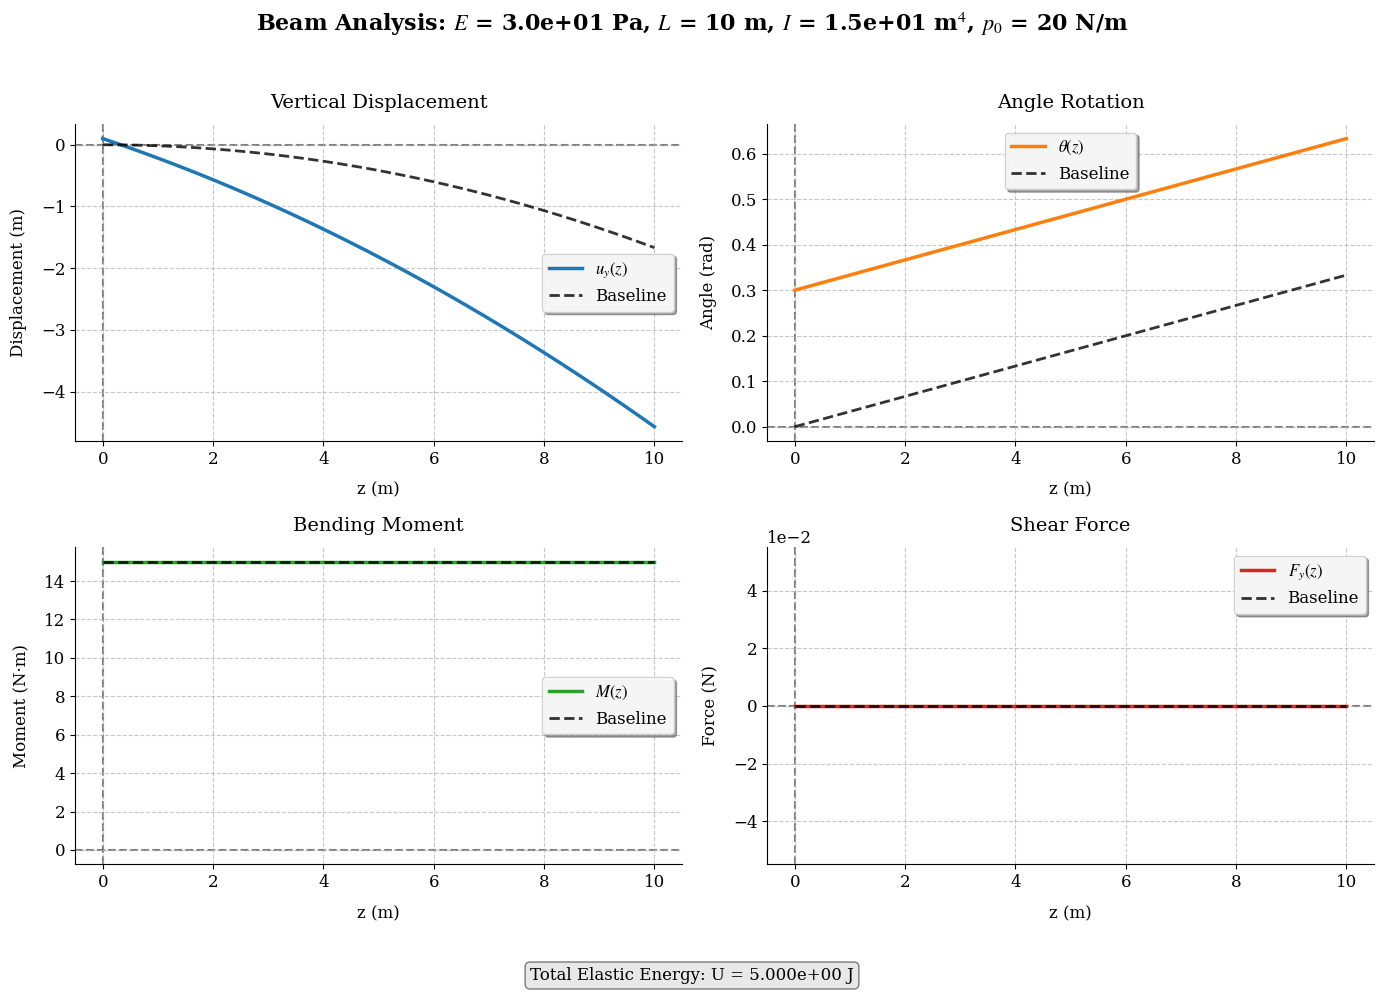

In [61]:
# Plot of the solution
plotter(sol, E_, L_, I_, p0_, f_, m_, nu0_, nuL_, theta0_, thetaL_)

In [62]:
# Solution for a simply supported beam with a bending moment
sol = solver('simply supported beam', True)

In [63]:
# Vertical displacement
sol[0]

u_0*(1 - z/L) + u_L*z/L + L*m*z/(6*E*I) - m*z**3/(6*E*I*L)

In [64]:
# Angle
sol[1]

u_0/L - u_L/L - L*m/(6*E*I) + m*z**2/(2*E*I*L)

In [65]:
# Bending moment
sol[2]

m*z/L

In [66]:
# Shear force
sol[3]

m/L

In [67]:
# Elastic energy
sol[4]

L*m**2/(3*E*I)

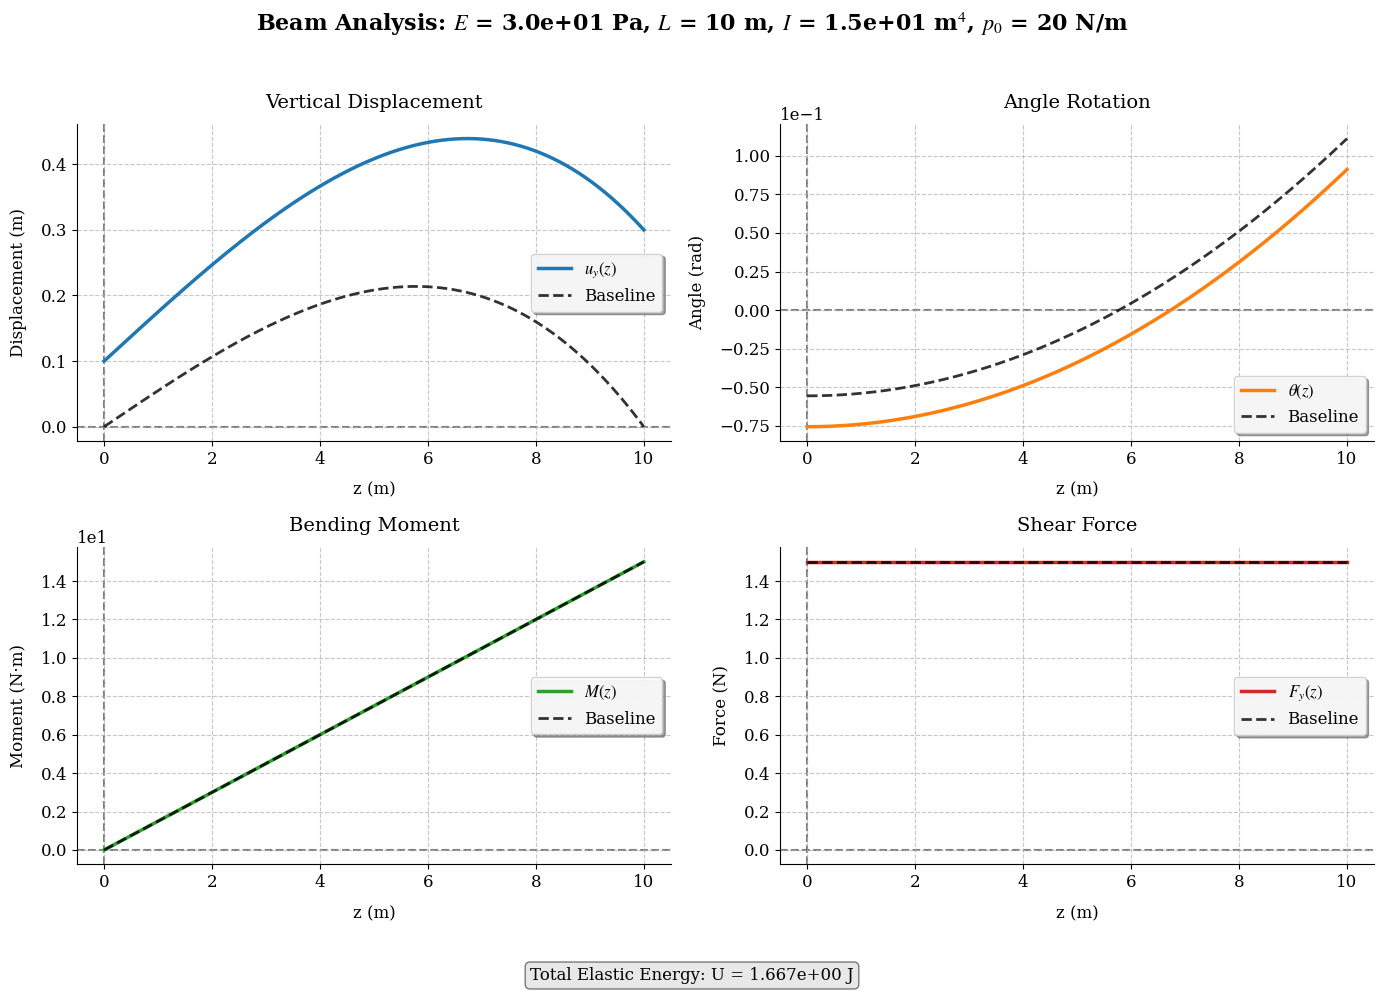

In [68]:
# Plot of the solution
plotter(sol, E_, L_, I_, p0_, f_, m_, nu0_, nuL_, theta0_, thetaL_)

In [69]:
# Solution for a propped-cantilever beam with a bending moment
sol = solver('propped-cantilever beam', True)

In [70]:
# Vertical displacement
sol[0]

\theta_0*(-z + 3*z**2/(2*L) - z**3/(2*L**2)) + u_0*(1 - 3*z**2/(2*L**2) + z**3/(2*L**3)) + u_L*(3*z**2/(2*L**2) - z**3/(2*L**3)) + m*z**2/(4*E*I) - m*z**3/(4*E*I*L)

In [71]:
# Angle
sol[1]

\theta_0*(1 - 3*z/L + 3*z**2/(2*L**2)) + u_0*(3*z/L**2 - 3*z**2/(2*L**3)) + u_L*(-3*z/L**2 + 3*z**2/(2*L**3)) - m*z/(2*E*I) + 3*m*z**2/(4*E*I*L)

In [72]:
# Bending moment
sol[2]

\theta_0*(-3*E*I/L + 3*E*I*z/L**2) - m/2 + u_0*(3*E*I/L**2 - 3*E*I*z/L**3) + u_L*(-3*E*I/L**2 + 3*E*I*z/L**3) + 3*m*z/(2*L)

In [73]:
# Shear force
sol[3]

3*E*I*\theta_0/L**2 - 3*E*I*u_0/L**3 + 3*E*I*u_L/L**3 + 3*m/(2*L)

In [74]:
# Elastic energy
sol[4]

3*E*I*\theta_0**2/L - 6*E*I*\theta_0*u_0/L**2 + 6*E*I*\theta_0*u_L/L**2 + 3*E*I*u_0**2/L**3 - 6*E*I*u_0*u_L/L**3 + 3*E*I*u_L**2/L**3 + L*m**2/(4*E*I)

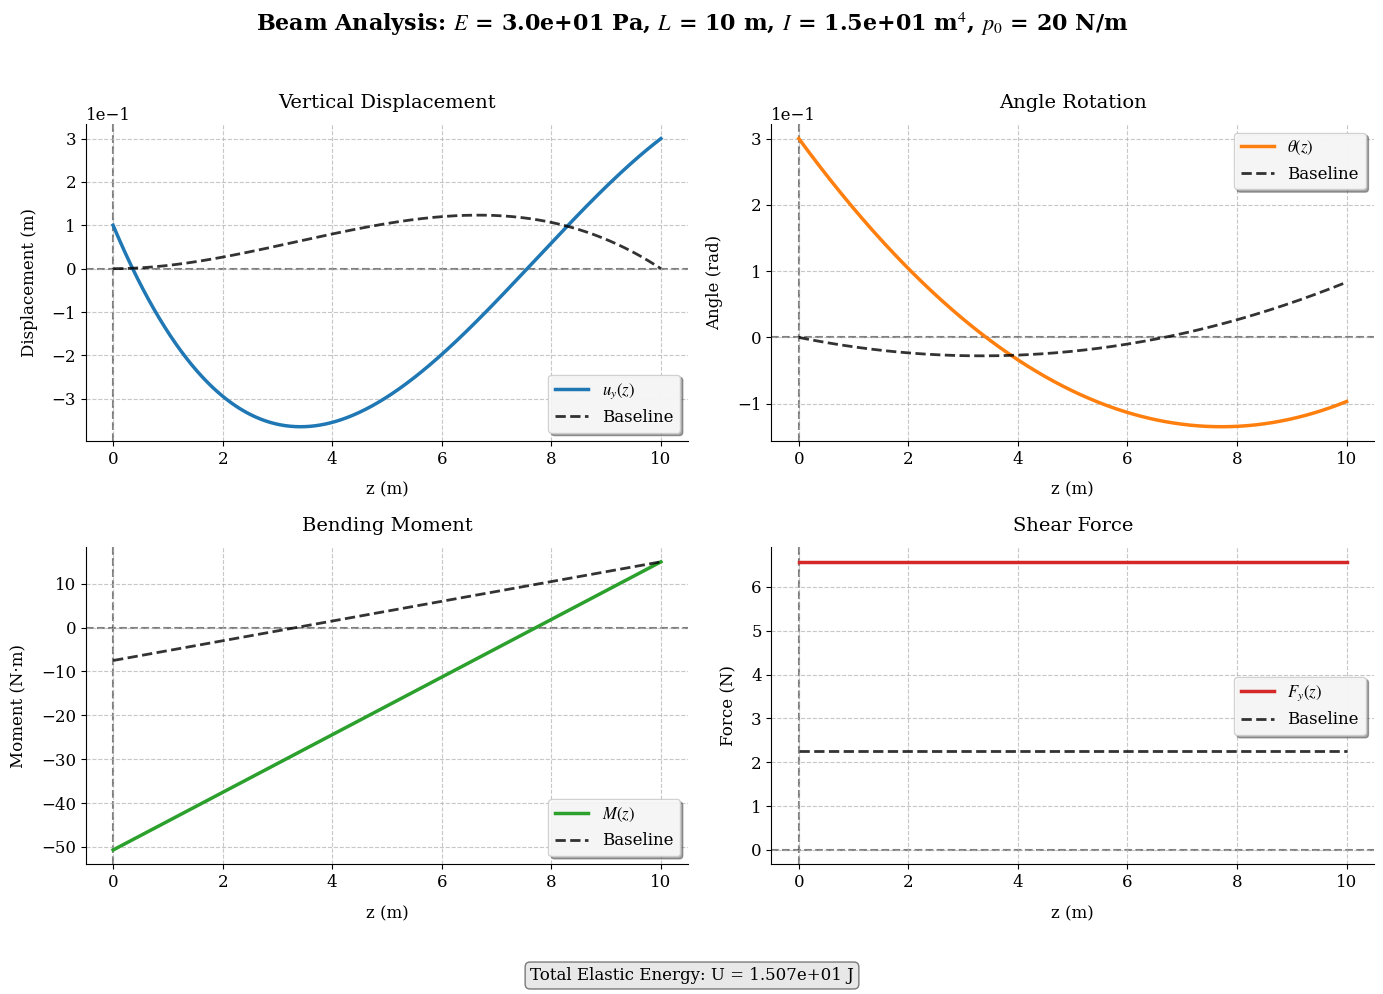

In [75]:
# Plot of the solution
plotter(sol, E_, L_, I_, p0_, f_, m_, nu0_, nuL_, theta0_, thetaL_)

In [76]:
# Solution for a fixed-guided beam with a concentrated force
sol = solver('fixed-guided beam', True)

In [77]:
# Vertical displacement
sol[0]

\theta_0*(-z + z**2/(2*L)) + u_0 - \theta_L*z**2/(2*L) + L*f*z**2/(4*E*I) - f*z**3/(6*E*I)

In [78]:
# Angle
sol[1]

\theta_0*(1 - z/L) + \theta_L*z/L - L*f*z/(2*E*I) + f*z**2/(2*E*I)

In [79]:
# Bending moment
sol[2]

-E*I*\theta_0/L + E*I*\theta_L/L - L*f/2 + f*z

In [80]:
# Shear force
sol[3]

f

In [81]:
# Elastic energy
sol[4]

E*I*\theta_0**2/L - 2*E*I*\theta_0*\theta_L/L + E*I*\theta_L**2/L + L**3*f**2/(12*E*I)

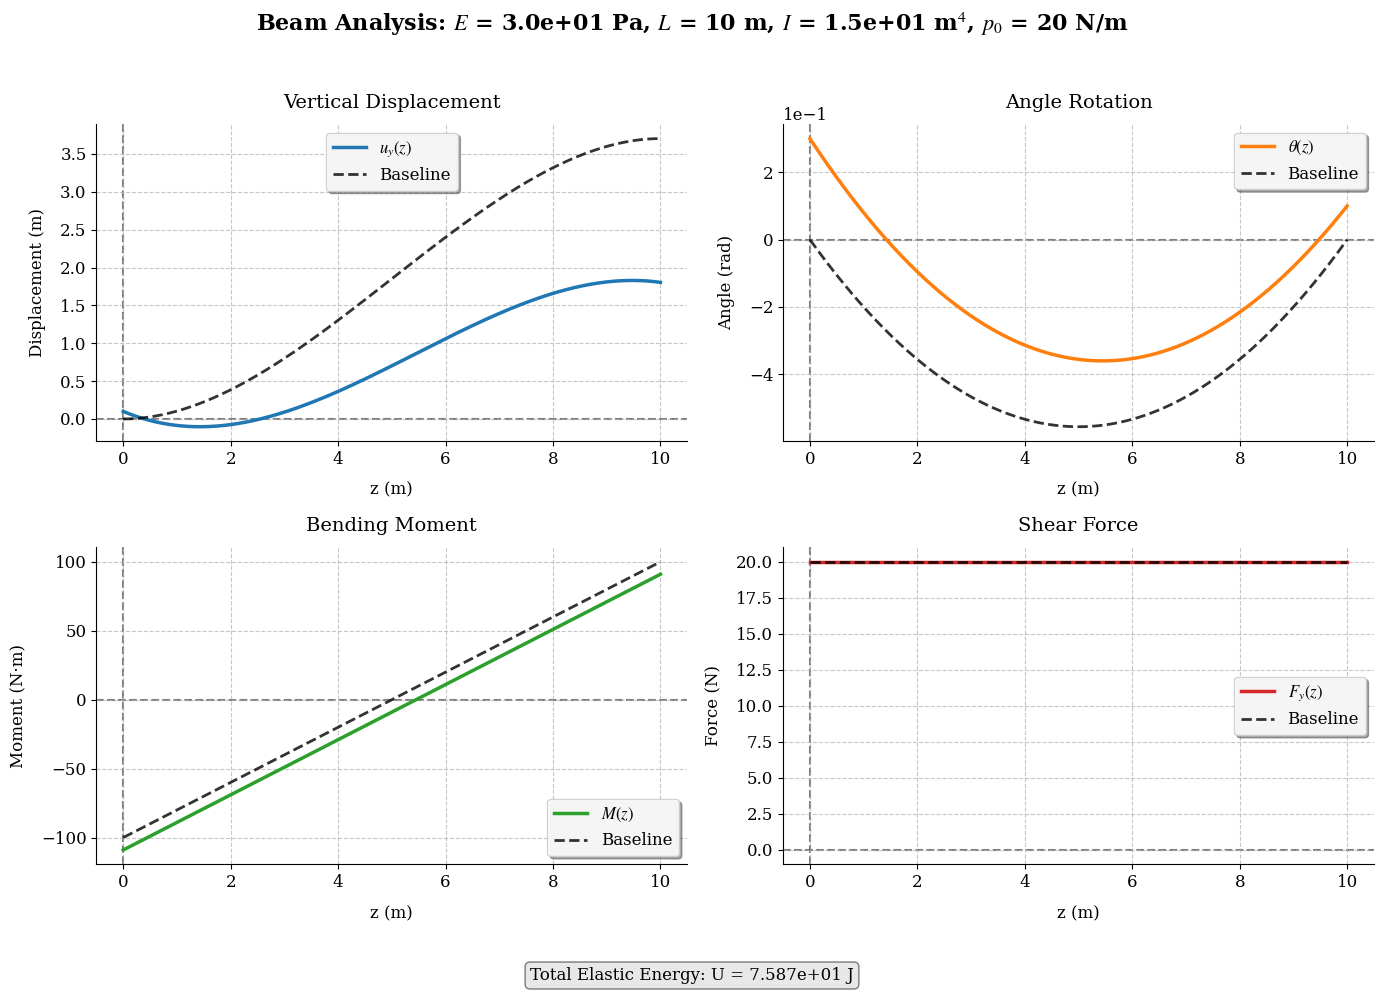

In [82]:
# Plot of the solution
plotter(sol, E_, L_, I_, p0_, f_, m_, nu0_, nuL_, theta0_, thetaL_)